# Test PARIETAL

Test the usability of the Brain Extraction utility PARIETAL. 

In [11]:
import ants
import time
from brain_extraction import BrainExtraction

ModuleNotFoundError: No module named 'brain_extraction'

## Object creation

Create a new `BrainExtraction` object with no options. By default, the method is configured using the `config.cfg` file at `config/config.cfg`:

```python
[data]
normalize = True
out_threshold = 0.5
workers = 10

[model]
model_name = campinas_baseline_s2_multires
sampling_step = 16
patch_shape = 32
use_gpu = True
gpu_number = 0
```


In [18]:
b = BrainExtraction()

## Load case example

We load a test example from the Calgary-Campinas dataset. 

In [16]:
input_scan = 'example/T1.nii.gz'
ground_truth = 'example/gt.nii.gz'
output_scan = 'example/parietal_output.nii.gz'

In [17]:
t = time.time()
brainmask = b.run(input_scan, output_scan)
print('expected time ', time.time() - t)

expected time  10.719368934631348


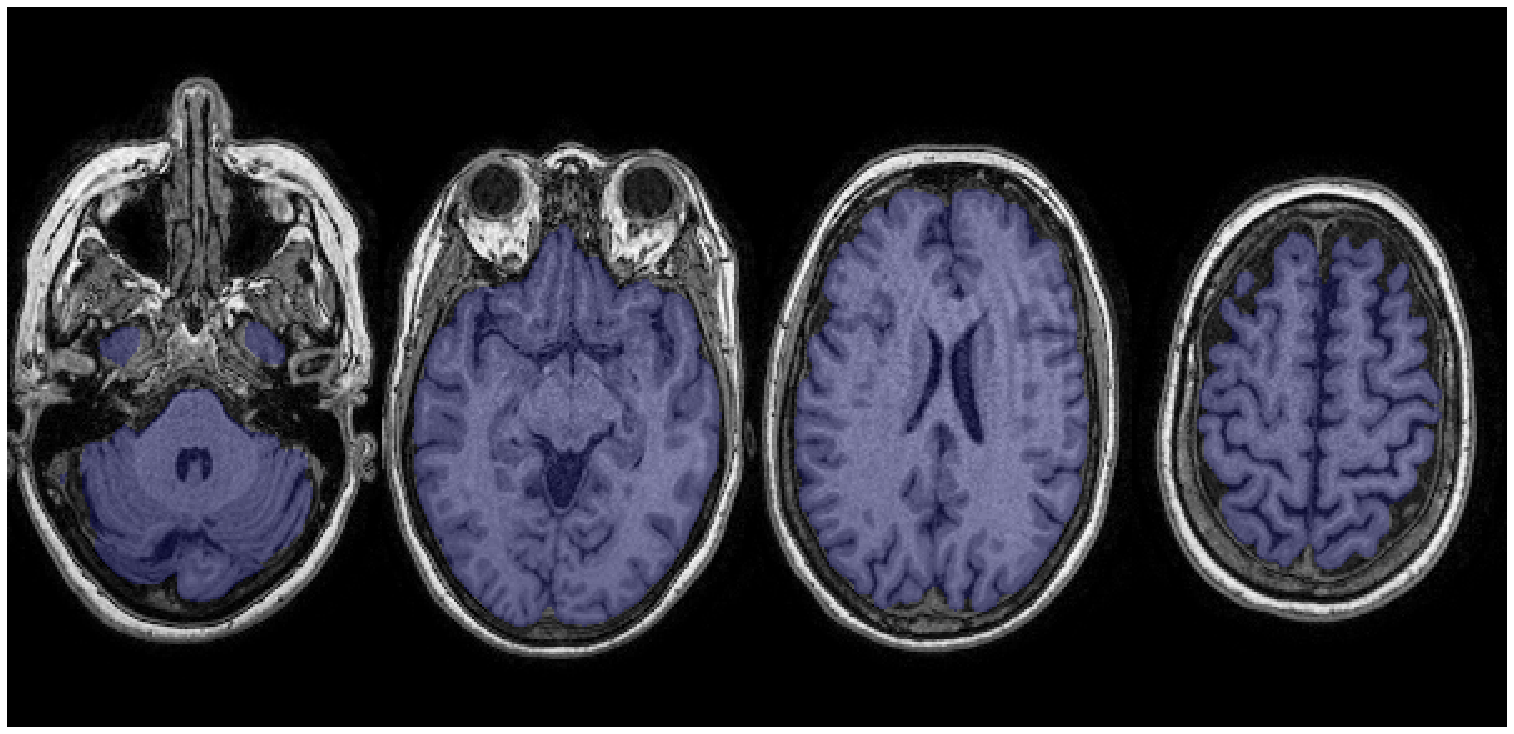

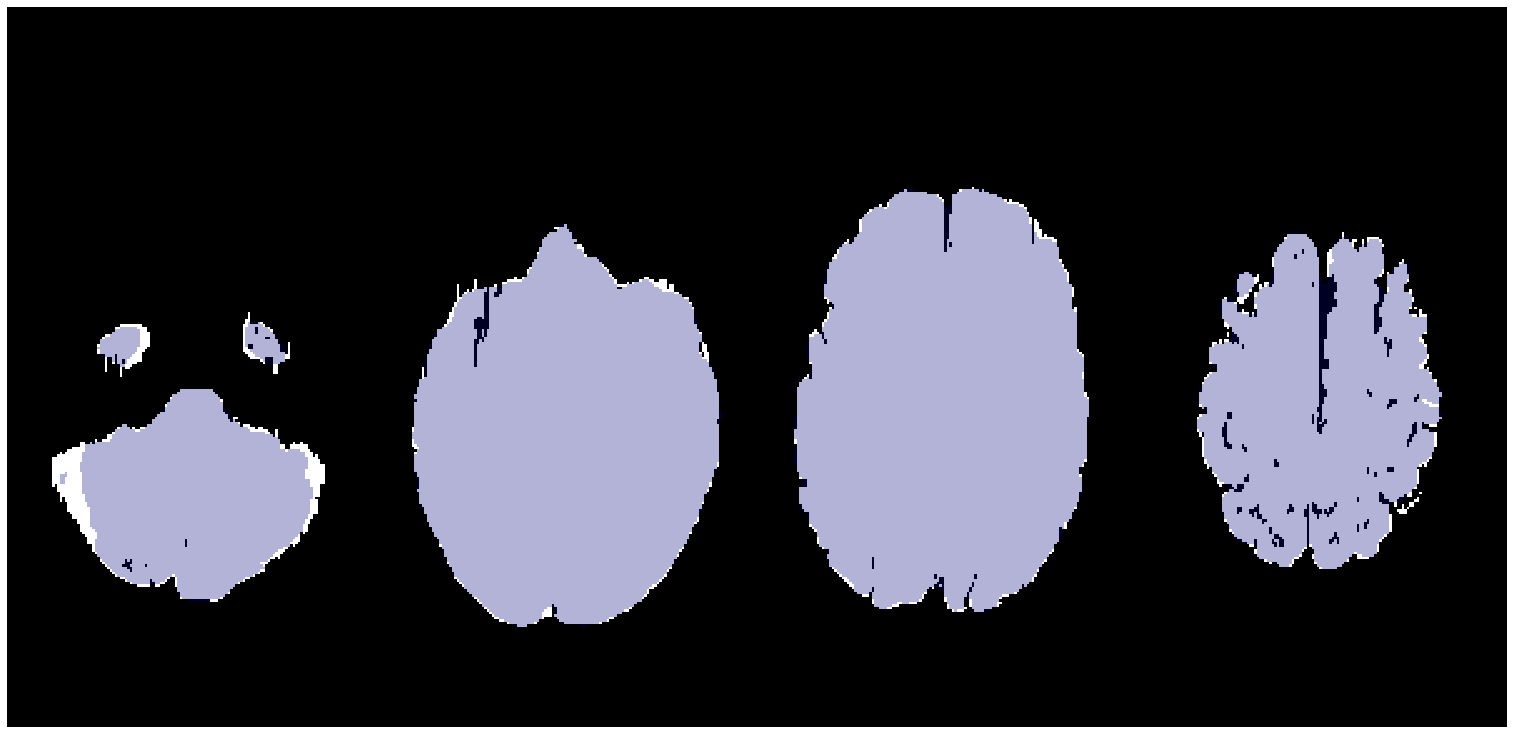

In [14]:
t1_scan = ants.image_read(input_scan)
brainmask_scan = ants.image_read(output_scan)
gt_scan = ants.image_read(ground_truth)

ants.plot(t1_scan, 
          axis=2,
          slices=(0.4, 0.5, 0.6, 0.7),
          figsize=10, 
          overlay=brainmask_scan,
          overlay_alpha=0.3)

ants.plot(gt_scan, 
          axis=2,
          slices=(0.4, 0.5, 0.6, 0.7),
          figsize=10, 
          overlay=brainmask_scan,
          overlay_alpha=0.3)